### 1 ISL Exercise 4.8.1 (10pts)

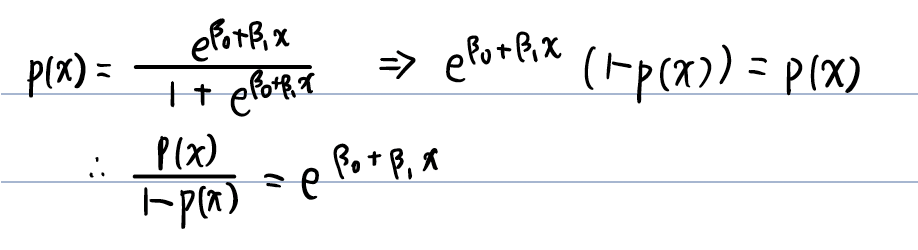

### 2 ISL Exercise 4.8.6 (10pts)

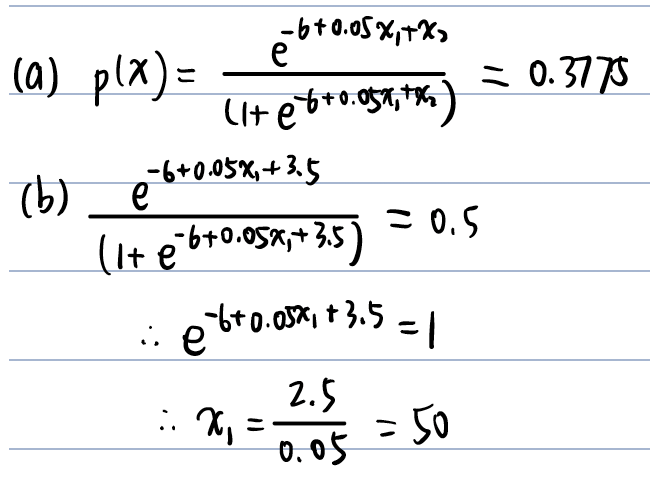

### 3 ISL Exercise 4.8.9 (10pts)

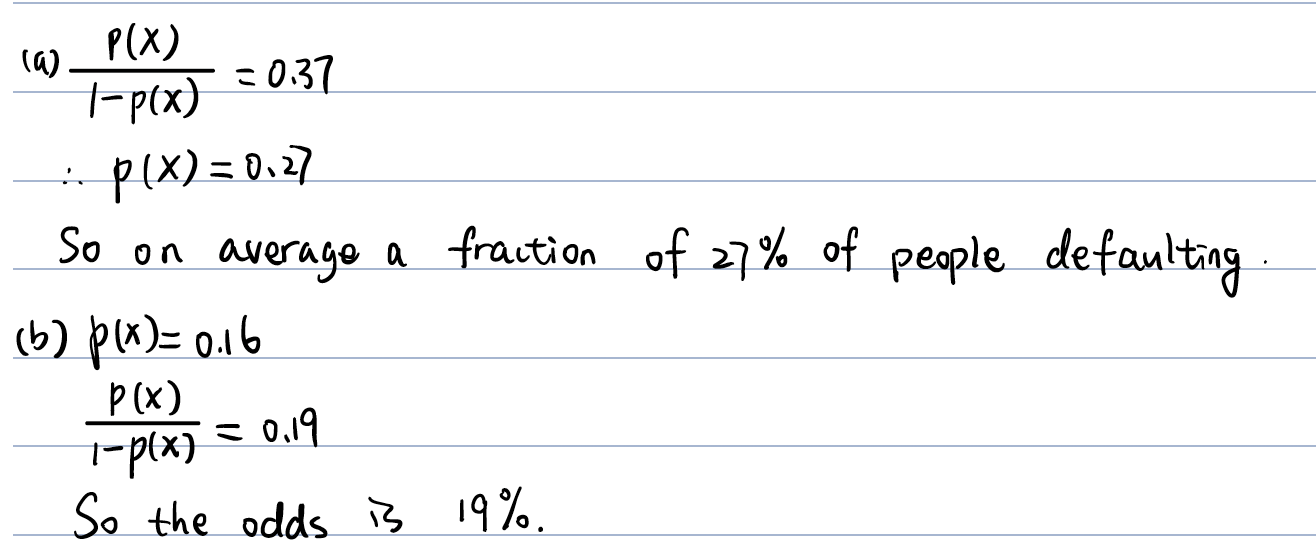

### 4 ISL Exercise 4.8.13 (a)-(i) (50pts)

In [5]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Weekly.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
data

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...
2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up


In [75]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.preprocessing import LabelEncoder
data.iloc[:,7] = LabelEncoder().fit_transform(data.iloc[:,7])

In [32]:
data

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...
2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1


In [33]:
#(a)
data.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


<Figure size 936x504 with 0 Axes>

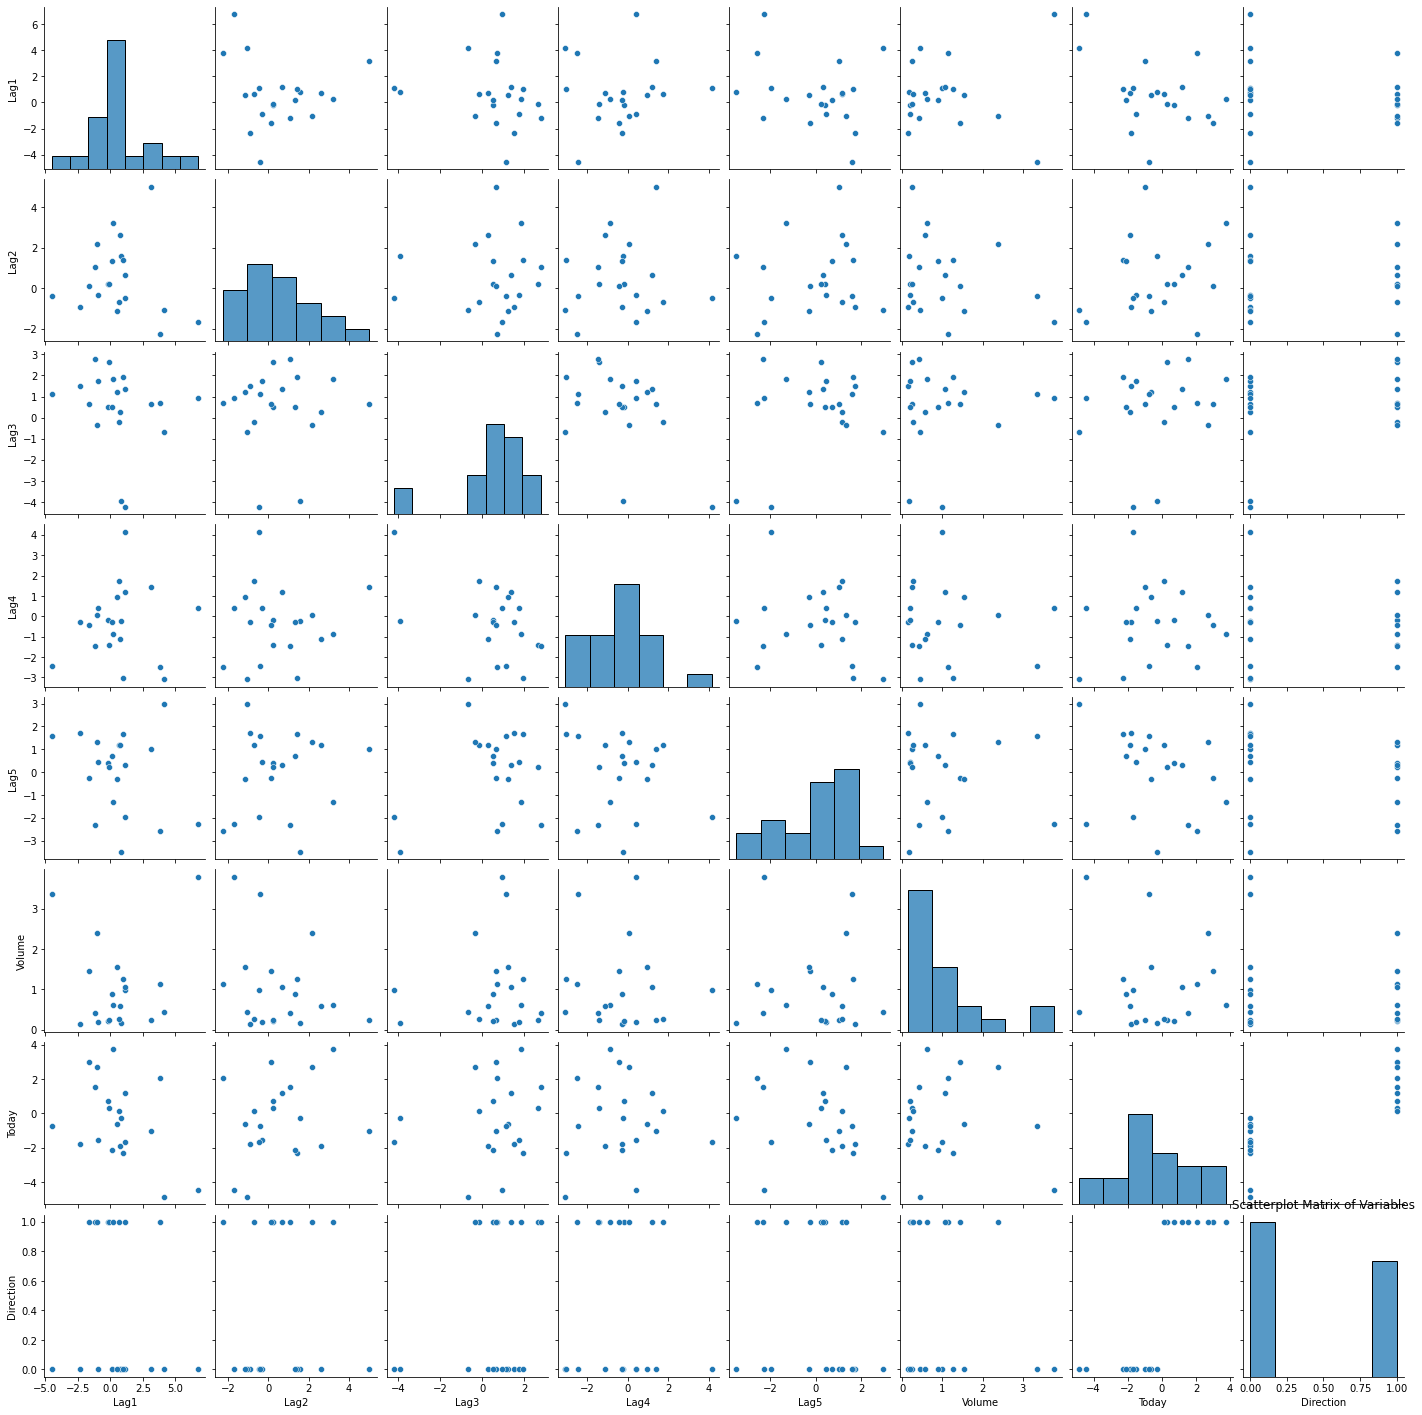

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
data2 = data[~data.index.duplicated()]
# scatterplot matrix of variables
plt.figure(figsize=(13,7))
sns.pairplot(data2)
plt.title("Scatterplot Matrix of Variables")
plt.show()

<AxesSubplot:>

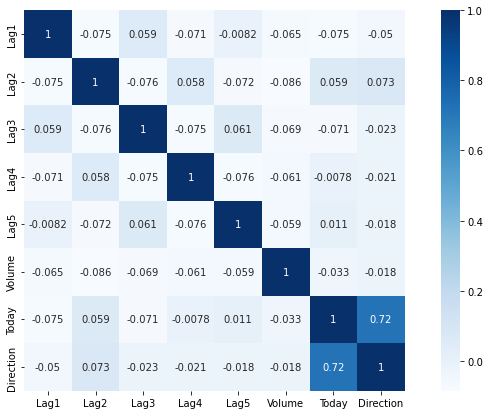

In [35]:
# correlation matrix of variables
plt.figure(figsize=(13,7))
corr= data.corr()
sns.heatmap(corr,cmap="Blues",annot=True,square = True)

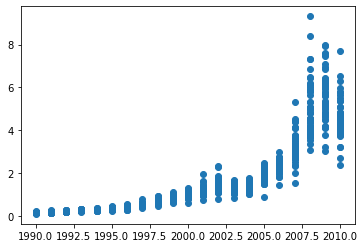

In [36]:
plt.scatter(data.index,data.Volume)

The correlations between the “lag” variables and today’s returns are close to zero. The only substantial correlation is between “Year” and “Volume”. When we plot “Volume”, we see that it is increasing over time.

In [37]:
#(b)
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit logistic regression
logit_mod = smf.logit(
  formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', 
  data = data
  ).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                0.006580
Time:                        11:41:52   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag 2 appears to have some statistical significance.

In [43]:
#(c)
import numpy as np
X = data[['Lag1' ,'Lag2','Lag3' ,'Lag4' ,'Lag5','Volume']]
y = data['Direction']
logit_smpred = np.where(logit_mod.predict(X) > 0.5, '1', '0')
  
# Confusion matrix from the logistic regression
logit_smcfm = pd.crosstab(
  logit_smpred, 
  y,
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
logit_smcfm

Direction,0,1,All
Prediction,,,
0,54,48,102
1,430,557,987
All,484,605,1089


We may conclude that the percentage of correct predictions on the training data is (54+557)/1089, wich is equal to 56.1%. In other words 43.9% is the training error rate, which is often overly optimistic. We could also say that for weeks when the market goes up, the model is right 92.1% of the time (557/(48+557)). For weeks when the market goes down, the model is right only 11.2% of the time (54/(54+430)).

In [49]:
#(d)
in_data=data.loc[data.index<=2008]
out_data=data.loc[data.index>2008]

In [52]:
logit_mod2 = smf.logit(
  formula = 'Direction ~ Lag2', 
  data = in_data
  ).fit()
logit_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                0.003076
Time:                        12:04:23   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [60]:
X2 = out_data[['Lag2']]
y2 = out_data['Direction']
logit_smpred2 = np.where(logit_mod2.predict(X2) > 0.5, '1', '0')
  
# Confusion matrix from the logistic regression
logit_smcfm2 = pd.crosstab(
  logit_smpred2, 
  y2,
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
logit_smcfm2

Direction,0,1,All
Prediction,,,
0,9,5,14
1,34,56,90
All,43,61,104


In this case, the percentage of correct predictions on the test data is (9+56)/104 wich is equal to 62.5%. In other words, 37.5% is the test error rate. We could also say that for weeks when the market goes up, the model is right 91.8% of the time (56/(56+5)). For weeks when the market goes down, the model is right only 20.9% of the time (9/(9+34)).

In [61]:
#(e)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

X1 = in_data[['Lag2']]
y1 = in_data['Direction']
# Pipeline
pipe_lda = Pipeline(steps = [
  ("model", LinearDiscriminantAnalysis())
])

# Fit LDA
lda_fit = pipe_lda.fit(X1, y1)

# Predicted labels from LDA
lda_pred = lda_fit.predict(X2)

# Confusion matrix
lda_cfm = pd.crosstab(
  lda_pred, 
  y2, 
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
lda_cfm

Direction,0,1,All
Prediction,,,
0,9,5,14
1,34,56,90
All,43,61,104


In this case, we may conclude that the percentage of correct predictions on the test data is 62.5%. In other words 37.5% is the test error rate. We could also say that for weeks when the market goes up, the model is right 91.8% of the time. For weeks when the market goes down, the model is right only 20.9% of the time. These results are approximately the same as those obtained with the logistic regression model, which is not surpising.

In [62]:
#(f)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Pipeline
pipe_qda = Pipeline(steps = [
  ("model", QuadraticDiscriminantAnalysis())
])

# Fit QDA
qda_fit = pipe_qda.fit(X1, y1)

# Predicted labels from QDA
qda_pred = qda_fit.predict(X2)

# Confusion matrix from the QDA
qda_cfm = pd.crosstab(
  qda_pred, 
  y2,
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
qda_cfm

Direction,0,1,All
Prediction,,,
1,43,61,104
All,43,61,104


In this case, we may conclude that the percentage of correct predictions on the test data is 58.7%. In other words 41.3% is the test error rate. We could also say that for weeks when the market goes up, the model is right 100% of the time. For weeks when the market goes down, the model is right only 0% of the time. We may notice that QDA model chooses “Up” the whole time.

In [63]:
#(g)
from sklearn.neighbors import KNeighborsClassifier

# Pipeline
pipe_knn = Pipeline(steps = [
  ("model", KNeighborsClassifier(n_neighbors = 1))
])

# Fit KNN with K = 1
knn_fit = pipe_knn.fit(X1, y1)

# Predicted labels from KNN
knn_pred = knn_fit.predict(X2)

# Confusion matrix of KNN
knn_cfm = pd.crosstab(
  knn_pred, 
  y2, 
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
knn_cfm

Direction,0,1,All
Prediction,,,
0,21,30,51
1,22,31,53
All,43,61,104


In this case, we may conclude that the percentage of correct predictions on the test data is 50%. In other words 50% is the test error rate. We could also say that for weeks when the market goes up, the model is right 50.8% of the time. For weeks when the market goes down, the model is right only 48.8% of the time.

In [64]:
#(h)
from sklearn.naive_bayes import GaussianNB

# Pipeline
pipe_nb = Pipeline(steps = [
  ("model", GaussianNB())
])

# Fit Naive Bayes classifier
nb_fit = pipe_nb.fit(X1, y1)

# Predicted labels by NB classifier
nb_pred = nb_fit.predict(X2)

# Confusion matrix of NB classifier
nb_cfm = pd.crosstab(
  nb_pred, 
  y2, 
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
nb_cfm

Direction,0,1,All
Prediction,,,
1,43,61,104
All,43,61,104


In this case, we may conclude that the percentage of correct predictions on the test data is 58.7%. In other words 41.3% is the test error rate. We could also say that for weeks when the market goes up, the model is right 100% of the time. For weeks when the market goes down, the model is right only 0% of the time.

(i) If we compare the test error rates, we see that logistic regression and LDA have the minimum error rates, followed by QDA and KNN and naive Bayes. So Logistic and LDA are better.

### 5 Bonus question: ISL Exercise 4.8.13 Part (j) (30pts)

In [65]:
#LDA with Lag1 and Lag2

X1 = in_data[['Lag1','Lag2']]
y1 = in_data['Direction']
X2 = out_data[['Lag1','Lag2']]
y2 = out_data['Direction']
# Pipeline
pipe_lda = Pipeline(steps = [
  ("model", LinearDiscriminantAnalysis())
])

# Fit LDA
lda_fit = pipe_lda.fit(X1, y1)

# Predicted labels from LDA
lda_pred = lda_fit.predict(X2)

# Confusion matrix
lda_cfm = pd.crosstab(
  lda_pred, 
  y2, 
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
lda_cfm

Direction,0,1,All
Prediction,,,
0,7,8,15
1,36,53,89
All,43,61,104


In [66]:
(7+53)/104

0.5769230769230769

In [67]:
#Logistic Regression with Lag1 interaction with Lag2

X1 = in_data[['Lag1','Lag2']]
y1 = in_data['Direction']
X2 = out_data[['Lag1','Lag2']]
y2 = out_data['Direction']
logit_mod3 = smf.logit(
  formula = 'Direction ~ Lag2*Lag1', 
  data = in_data
  ).fit()

logit_smpred3 = np.where(logit_mod3.predict(X2) > 0.5, '1', '0')
  
# Confusion matrix from the logistic regression
logit_smcfm3 = pd.crosstab(
  logit_smpred3, 
  y2,
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
logit_smcfm3

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4


Direction,0,1,All
Prediction,,,
0,7,8,15
1,36,53,89
All,43,61,104


In [68]:
(7+53)/104

0.5769230769230769

In [76]:
#QDA with sqrt(abs(Lag2))

in_data['sqrt']=np.sqrt(np.abs(in_data[['Lag2']]))

out_data['sqrt']=np.sqrt(np.abs(out_data[['Lag2']]))

X1 = in_data[['Lag2','sqrt']]
y1 = in_data['Direction']
X2 = out_data[['Lag2','sqrt']]
y2 = out_data['Direction']
# Fit QDA
qda_fit = pipe_qda.fit(X1, y1)

# Predicted labels from QDA
qda_pred = qda_fit.predict(X2)

# Confusion matrix from the QDA
qda_cfm = pd.crosstab(
  qda_pred, 
  y2,
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
qda_cfm

Direction,0,1,All
Prediction,,,
0,12,13,25
1,31,48,79
All,43,61,104


In [77]:
(12+48)/104

0.5769230769230769

In [80]:
# KNN k =5
X1 = in_data[['Lag2']]
y1 = in_data['Direction']
X2 = out_data[['Lag2']]
y2 = out_data['Direction']
pipe_knn = Pipeline(steps = [
  ("model", KNeighborsClassifier(n_neighbors = 5))
])

# Fit KNN with K = 5
knn_fit = pipe_knn.fit(X1, y1)

# Predicted labels from KNN
knn_pred = knn_fit.predict(X2)

# Confusion matrix of KNN
knn_cfm = pd.crosstab(
  knn_pred, 
  y2, 
  margins = True, 
  rownames = ['Prediction'],
  colnames = ['Direction']
  )
knn_cfm

Direction,0,1,All
Prediction,,,
0,15,21,36
1,28,40,68
All,43,61,104


In [81]:
(15+40)/104

0.5288461538461539

Out of these combinations, the original logistic regression and LDA have the best performance in terms of test error rates.

### 6 Bonus question: ISL Exercise 4.8.4 (30pts

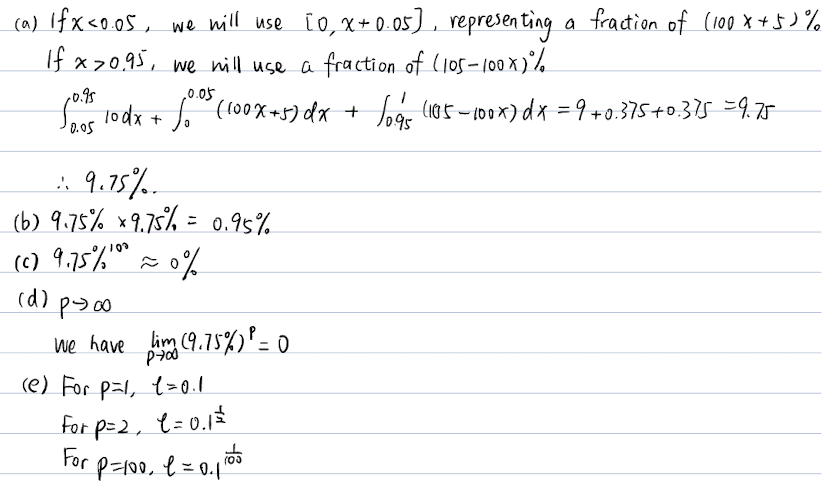